In [2]:
#import package
import numpy as np
import pandas as pd
import matplotlib.pyplot
import seaborn as sns

import datasist as ds

### Import autoViMal 

make sure you already install autovimal using pip install autoviml

In [3]:
from autoviml.Auto_ViML import Auto_ViML

Imported Auto_ViML version: 0.1.472. Call using: 
             m, feats, trainm, testm = Auto_ViML(train, target, test, 
                                    sample_submission='',
                                    scoring_parameter='',
                                    hyper_param='GS',feature_reduction=True,
                                     Boosting_Flag=None,Binning_Flag=False,
                                    Add_Poly=0, Stacking_Flag=False,Imbalanced_Flag=False, 
                                    verbose=0)
            
To remove previous versions, perform 'pip uninstall autoviml'


In [4]:
#Read Dataset
train = pd.read_csv("df_train2.csv")
test = pd.read_csv("df_test2.csv")

##### Display missing value using Datasist 

In [5]:
ds.structdata.display_missing(train)

,features,missing_counts,missing_percent
0,EmployeeNo,0,0.0
1,Division,0,0.0
2,Qualification,0,0.0
3,Gender,0,0.0
4,Channel_of_Recruitment,0,0.0
5,Trainings_Attended,0,0.0
6,Last_performance_score,0,0.0
7,Targets_met,0,0.0
8,Previous_Award,0,0.0
9,Foreign_schooled,0,0.0


In [7]:
#load submission file
sub = pd.read_csv('sample_submit.csv')

In [8]:
#Target
target = 'Promoted_or_Not'

In [9]:
sample_submission= sub
scoring_parameter = 'balanced-accuracy'

Train (Size: 36633,17) has Single_Label with target: ['Promoted_or_Not']
"
 ################### Binary-Class ##################### " 
Shuffling the data set before training
 Class  -> Counts -> Percent
     0:   33474  ->   91.4%
     1:    3159  ->    8.6%
Selecting Binary_Classification Classifier...
    Using GridSearchCV for Hyper Parameter tuning...
    Target Promoted_or_Not is already numeric. No transformation done.
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  10
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  5
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    16 Predictors classified...
        This does not include the Target column(s)
    1 v

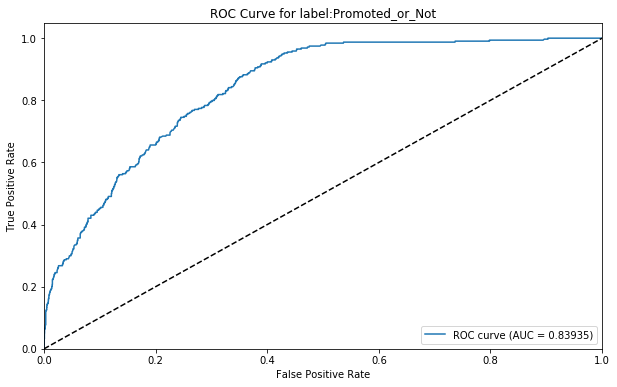

Average precision-recall score: 0.83
Macro F1 score, averaged over all classes: 0.55


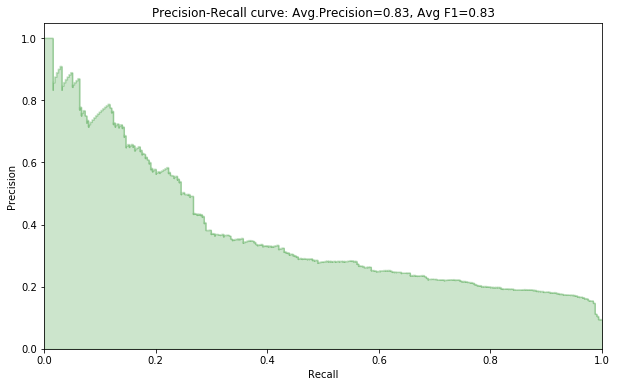

No evaluation metrics plot available for this model
    Time taken for this Target (in seconds) = 2084
Plotting Feature Importances to explain the output of model
###################################################################################
Training model on complete Train data and Predicting using give Test Data...
    No Entropy Binning specified or there are no numeric vars in data set to Bin
CAUTION: Stacking can produce Highly Overfit models on Training Data...
    Time taken for Stacking: 0.3 seconds
    Adding 2 Stacking feature(s) to training data
    Time taken for Stacking: 0.0 seconds
Model Training time taken in seconds = 1
Test Data predictions using Threshold = 0.5
    Saving predictions to .\Promoted_or_Not\Promoted_or_Not_Binary_Classification_test_modified.csv
    Saving sample_submission...
    Saving predictions to .\Promoted_or_Not\Promoted_or_Not_Binary_Classification_submission.csv
    Saving predictions to .\Promoted_or_Not\Promoted_or_Not_Binary_Classifica

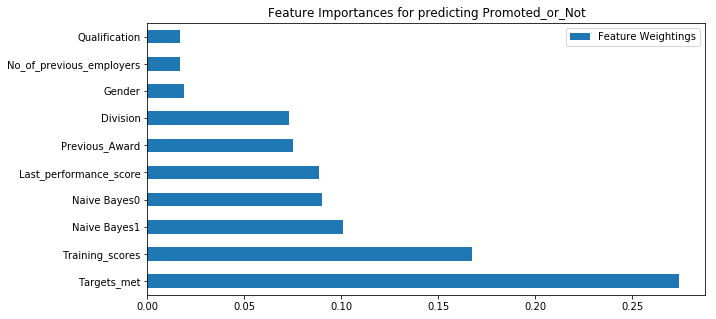

In [12]:
m, feats, trainm, testm = Auto_ViML(train, target, test, sample_submission,
                                    scoring_parameter=scoring_parameter,
                                    hyper_param='GS',feature_reduction=True,
                                     Boosting_Flag=False,Binning_Flag=False,
                                    Add_Poly=0, Stacking_Flag=True,                                    
                                    Imbalanced_Flag=False, 
                                    verbose=1)

In [15]:
sub = pd.read_csv('submit.csv')

In [16]:
sub.head()

,EmployeeNo,Promoted_or_Not,Promoted_or_Not_proba_0,Promoted_or_Not_proba_1,Promoted_or_Not_Stacked_predictions
0,YAK/S/34385,1,0.978389,0.021611,0
1,YAK/S/27825,1,0.973686,0.026314,0
2,YAK/S/23870,1,0.879451,0.120549,0
3,YAK/S/54784,1,0.941097,0.058903,0
4,YAK/S/25058,1,0.849803,0.150197,0


In [26]:
new_sub = sub[['EmployeeNo', 'Promoted_or_Not_Stacked_predictions']]

In [27]:
new_sub.to_csv('subb.csv', index = False)

In [28]:
new_sub.head()

,EmployeeNo,Promoted_or_Not_Stacked_predictions
0,YAK/S/34385,0
1,YAK/S/27825,0
2,YAK/S/23870,0
3,YAK/S/54784,0
4,YAK/S/25058,0
